In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"osada24","key":"a90ff84359ec669fe59d0e2e05d865dc"}'}

In [9]:
import os
import json

In [12]:
# kaggle.jsonファイルのパスを設定
kaggle_json_path = '/content/kaggle.json'

In [14]:
with open(kaggle_json_path, 'r') as f:
    kaggle_json = json.load(f)
    os.environ['KAGGLE_USERNAME'] = kaggle_json['username']
    os.environ['KAGGLE_KEY'] = kaggle_json['key']

In [15]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 46.5MB/s]


In [16]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


データ

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:

gender_sub = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [23]:
test_shape = test.shape
train_shape = train.shape

print(test_shape)
print(train_shape)

(418, 11)
(891, 12)


In [24]:
train.isna().sum() #train.isna()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
#medianでAgeの欠損を埋める
train["Age"] = train["Age"].fillna(train["Age"].median())

#cabin enbarked ticket nameは削除
train = train.drop(['Cabin','Embarked','Ticket', 'Name'], axis=1)

In [ ]:
train = pd.get_dummies(train, columns=["Sex"], dtype='int') #dtypeを入れないとtrue falseで表示された

In [64]:
train = train.drop(['Sex_male_True'], axis=1)

In [69]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,female
0,1,0,3,22.0,1,0,7.2500,1,0
1,2,1,1,38.0,1,0,71.2833,0,1
2,3,1,3,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0
887,888,1,1,19.0,0,0,30.0000,0,1
888,889,0,3,28.0,1,2,23.4500,0,1
889,890,1,1,26.0,0,0,30.0000,1,0


変数間の関係を見る

<function matplotlib.pyplot.show(close=None, block=None)>

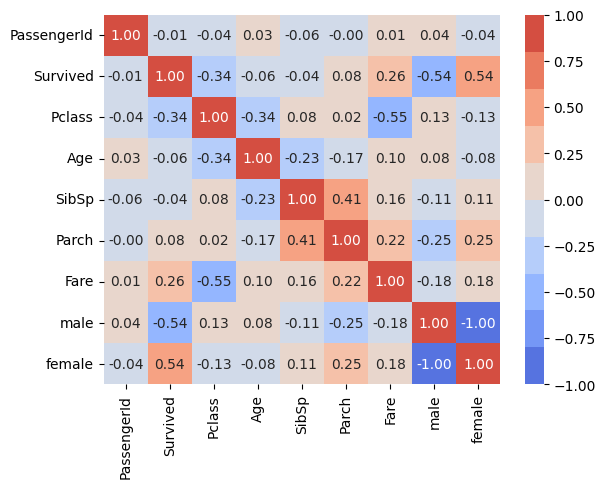

In [74]:
df=train
corr=df.corr()

sns.heatmap(corr, cmap=sns.color_palette('coolwarm', 10), annot=True, fmt='.2f')
plt.show
#PclassとかFareとかはやっぱり重要そう。ほかは値が小さくてわからない。

In [77]:
train.groupby('Survived')['female'].value_counts()

Survived  female
0         0         468
          1          81
1         1         233
          0         109
Name: count, dtype: int64

分析

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [79]:
#決定木
df = train
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルを作成する
clf = DecisionTreeClassifier()

# モデルを学習させる
clf.fit(X_train, y_train)

# テストデータで予測を行う
y_pred = clf.predict(X_test)

# 予測精度を評価する
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7150837988826816


In [81]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8212290502793296